In [1]:
using Plots
using Gen

In [2]:
x = range(20, 100, length=100)
y=range(0,stop=0.0,length=100)
#y = range(0,100, length=100)
z=range(0,stop=0.0,length=100)

0.0:0.0:0.0

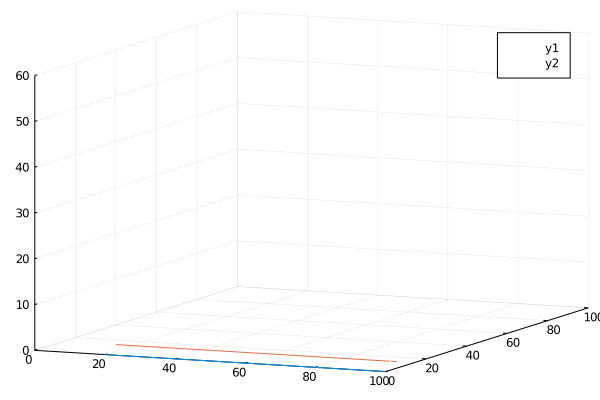

In [12]:
plt = plot3d(
    x,y,z,
    xlim = (0, 100),
    ylim = (0, 100),
    zlim = (0, 60),
    camera=(30,30)
)
x2 = range(-2,stop=2,length=100)
y2= range(0,stop=50,length=100)
z2=range(0,stop=100,length=100)
plt = plot3d!(
    x.+2, y.+2, z.+2
)

In [13]:
@gen function rail_model(xs::Vector{Float64})
    n = length(xs)
    
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    slope = @trace(normal(0, 1), :slope)
    intercept = @trace(normal(0, 1), :intercept)
    
    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    for (i, x) in enumerate(xs)
        @trace(normal(slope * x + intercept, 0.1), (:r1, i))
        @trace(normal(slope * x + intercept+2, 0.1), (:r2, i))
    end
    
    # The return value of the model is often not particularly important,
    # Here, we simply return n, the number of points.
    return n
end;

In [14]:
function render_trace(trace)
    
    # Pull out xs from the trace
    xs = get_args(trace)[1]
    
    xmin = minimum(xs)
    xmax = maximum(xs)
    y_r1 = [trace[(:r1, i)] for i=1:length(xs)]
    y_r2 = [trace[(:r2, i)] for i=1:length(xs)]
    
    # Pull out slope and intercept from the trace
    slope = trace[:slope]
    intercept = trace[:intercept]
    z =range(0,stop=0.0,length=length(xs))
    # Draw the line
    plot = plot3d([xs, xs], [((xs.*slope) .+intercept), ((xs .* slope) .+ intercept .+ 2)] , [z, z])#, layout=2)
    #plot = plot3d(xs, (xs.*slope) .+intercept, z)
    #plot = plot3d!(xs, (xs .* slope) .+ intercept .+ 2, z)
    return plot
end;

In [15]:
xs = Vector(range(1., 5., length=2))
xs

2-element Vector{Float64}:
 1.0
 5.0

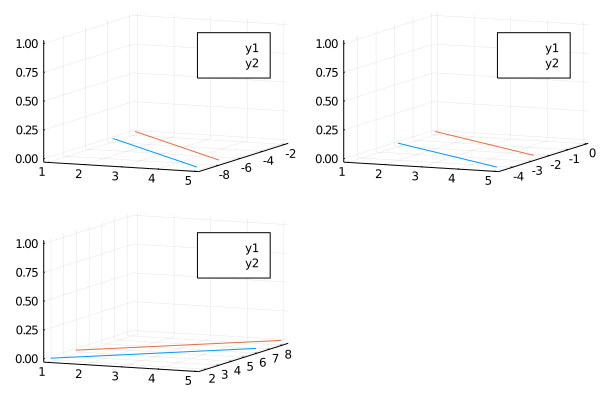

In [16]:
trace1 = Gen.simulate(rail_model, (xs,));
trace2 = Gen.simulate(rail_model, (xs,));
trace3 = Gen.simulate(rail_model, (xs,));
plot1 = render_trace(trace1);
plot2 = render_trace(trace2);
plot3 = render_trace(trace3);
plot3d(plot1, plot2, plot3, layout=3)

LoadError: MethodError: no method matching iterate(::Plots.Plot{Plots.GRBackend})
[0mClosest candidates are:
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m) at range.jl:664
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m, [91m::Int64[39m) at range.jl:664
[0m  iterate([91m::T[39m) where T<:Union{Base.KeySet{var"#s79", var"#s78"} where {var"#s79", var"#s78"<:Dict}, Base.ValueIterator{var"#s77"} where var"#s77"<:Dict} at dict.jl:693
[0m  ...

0.0:0.0:0.0

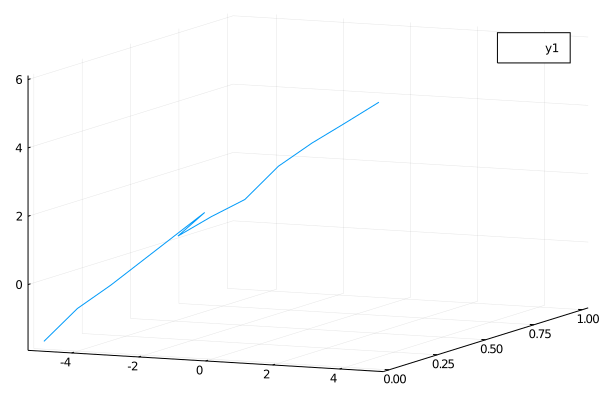